In [1]:
%matplotlib inline

In [2]:
from data_loader import load_umachine_z0
mock = load_umachine_z0()
cenmask = mock['upid'] == -1
print(mock.keys())

['id', 'upid', 'sfr', 'hostid', 'logmhost', 'logsm', 'log_ssfr', 'x', 'y', 'z', 'logmpeak']


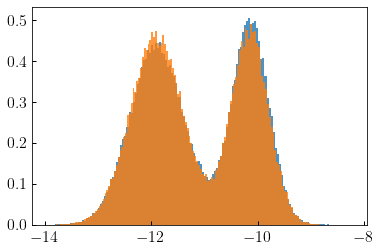

In [3]:
from hod_um_approx import generate_um_hod_mock
mock['log_ssfr_hod'] = generate_um_hod_mock(
    mock['upid'], mock['logsm'], mock['logmhost'])
mock['log_ssfr_hod2'] = generate_um_hod_mock(
    mock['upid'], mock['logsm'], mock['logmhost'], satboost=True)

satmask = mock['upid'] != -1

fig, ax = plt.subplots(1, 1)
__=ax.hist(mock['log_ssfr'][satmask], bins=150, density=True, alpha=0.8)
# __=ax.hist(mock['log_ssfr_hod'], bins=150, density=True, alpha=0.8)
__=ax.hist(mock['log_ssfr_hod2'][satmask], bins=150, density=True, alpha=0.8)


In [4]:
from halotools.mock_observables import return_xyz_formatted_array, tpcf
from halotools.sim_manager import CachedHaloCatalog

particles = CachedHaloCatalog(simname='bolplanck', redshift=0).ptcl_table
nptot = particles['x'].size
nselect = int(2e5)
indx_ran = np.random.choice(np.arange(nptot), nselect, replace=False).astype(int)
pos_ptcls = return_xyz_formatted_array(
    particles['x'][indx_ran], particles['y'][indx_ran], particles['z'][indx_ran], period=250)

logsm_mask = np.abs(mock['logsm'] - 10) < 0.15
qmask1 = mock['log_ssfr_hod'] < -11
qmask2 = mock['log_ssfr_hod2'] < -11

pos1 = return_xyz_formatted_array(
    mock['x'], mock['y'], mock['z'], period=250, mask=logsm_mask&qmask1)
pos2 = return_xyz_formatted_array(
    mock['x'], mock['y'], mock['z'], period=250, mask=logsm_mask&qmask2)


In [5]:
logrbins = np.linspace(-1, np.log10(35), 25)
logrmids = 0.5*(logrbins[:-1] + logrbins[1:])
rbins = 10**logrbins
rmids = 10**logrmids

xi1 = tpcf(pos1, rbins, sample2=pos_ptcls, period=250, do_auto=False)
xi2 = tpcf(pos2, rbins, sample2=pos_ptcls, period=250, do_auto=False)
xipp = tpcf(pos_ptcls, rbins, period=250)

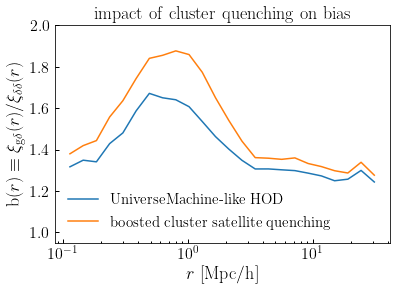

In [6]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.95, 2)

xscale = ax.set_xscale('log')
__=ax.plot(rmids, xi1/xipp, label=r'${\rm UniverseMachine}$-${\rm like\ HOD}$')
__=ax.plot(rmids, xi2/xipp, label=r'${\rm boosted\ cluster\ satellite\ quenching}$')

xlabel = ax.set_xlabel(r'$r\ [{\rm Mpc/h}]$')
ylabel = ax.set_ylabel(r'${\rm b}(r)\equiv\xi_{\rm g\delta}(r) / \xi_{\rm \delta\delta}(r)$')
title = ax.set_title(r'${\rm impact\ of\ cluster\ quenching\ on\ bias}$')

leg = ax.legend()
fig.savefig('FIGS/cluster_satellite_quenching_boost_bias_impact.png',
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)